In [1]:
import os
import glob

import numpy as np
import cv2
import matplotlib.pyplot  as plt
import matplotlib.image as mpimg
from skimage.feature import hog
%matplotlib inline

shape:  (64, 64, 3)


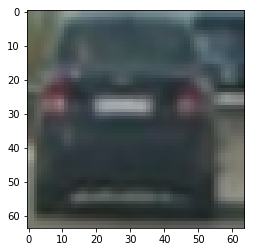

In [2]:
# read an image
image = mpimg.imread("./data/vehicles/GTI_MiddleClose/image0000.png")
print("shape: ", image.shape)
plt.imshow(image);

In [3]:
# Define a function to compute color histogram features  
# Pass the color_space flag as 3-letter all caps string
# like 'HSV' or 'LUV' etc.
# KEEP IN MIND IF YOU DECIDE TO USE THIS FUNCTION LATER
# IN YOUR PROJECT THAT IF YOU READ THE IMAGE WITH 
# cv2.imread() INSTEAD YOU START WITH BGR COLOR!
def bin_spatial(img, color_space='RGB', size=(32, 32)):
    # Convert image to new color space (if specified)
    if color_space == 'HSV':
        feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    elif color_space == 'LUV':
        feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
    elif color_space == 'HLS':
        feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    elif color_space == 'YUV':
        feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    elif color_space == 'YCrCb':
        feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    # Use cv2.resize().ravel() to create the feature vector
    resized = cv2.resize(img, size)
    features = resized.ravel() # Remove this line!
    # Return the feature vector
    return features

In [4]:
feature_vec = bin_spatial(image, color_space='HSV', size=(32, 32))

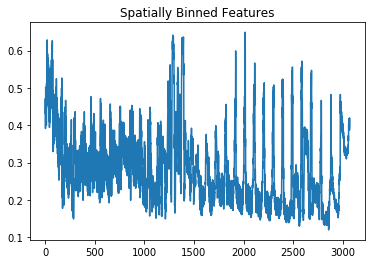

In [5]:
# Plot features
plt.plot(feature_vec);
plt.title('Spatially Binned Features');

In [6]:
# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, vis=False, feature_vec=True):
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=False, 
                                  visualise=True, feature_vector=False)
        return features, hog_image
    else:      
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=False, 
                       visualise=False, feature_vector=feature_vec)
        return features

In [7]:
pix_per_cell = 8
cell_per_block = 2
orient = 9

gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
features, hog_image = hog(gray, orientations=orient,
                          pixels_per_cell=(pix_per_cell, pix_per_cell), 
                          cells_per_block=(cell_per_block, cell_per_block), 
                          visualise=True, feature_vector=False,
                          block_norm="L2-Hys")

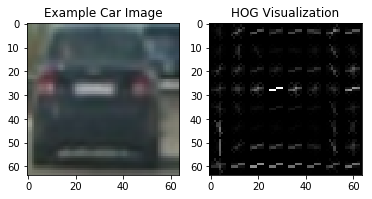

In [8]:
# Plot the examples
fig = plt.figure()
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Example Car Image')
plt.subplot(122)
plt.imshow(hog_image, cmap='gray')
plt.title('HOG Visualization')

In [9]:
hog_image.

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.00458486, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.00144676,  0.        , ...,  0.        ,
         0.00075032,  0.        ],
       ..., 
       [ 0.        ,  0.00021233,  0.        , ...,  0.        ,
         0.00210371,  0.        ],
       [ 0.        ,  0.        ,  0.00072727, ...,  0.00032071,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])